# Feature Engineering
Encode each bag with the statistics of each of their features

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import auc
import joblib

pd.set_option('display.float_format', lambda x: '%.3f' % x)

DATA_PATH = "./../../data/curated/dataset_scaled.csv"
BAG_DATA_PATH = "./../../data/curated/bag_data.csv"
MODEL_SAVE_PATH = "./../../model/rf-ntrees-1000"

In [2]:
# data = pd.read_csv(DATA_PATH).iloc[:, 1:] # exclude the first column as it is the index

In [3]:
# bag_data = data.groupby(["bag_id", "label"]).quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1])
# bag_data = bag_data.reset_index().pivot(index = ['bag_id', 'label'], 
#                                         columns=['level_2'], 
#                                         values=['left_dwell', 'left_std', 'left_mean',
#                                                 'mid_dwell', 'mid_std', 'mid_mean',
#                                                 'right_dwell', 'right_std', 'right_mean']
#                                        )
# new_colnames = [(c[0] + " " + str(c[1])).strip() for c in bag_data.reset_index().columns]
# bag_data = bag_data.reset_index()
# bag_data.columns = new_colnames
# bag_data

In [4]:
# bag_data.to_csv(BAG_DATA_PATH)

# Modelling
Choose `mode = "train"` to retrain the RF classifier.
Choose `mode = "load"` to load the saved RF classifier.

In [5]:
bag_data = pd.read_csv(BAG_DATA_PATH).iloc[:,1:]
mode = "load"

In [6]:
# Generating test samples
random.seed(1)
test_indices = random.sample(range(0, bag_data.shape[0]), bag_data.shape[0] // 5)
test_set = bag_data.iloc[test_indices, :].reset_index(drop = True)
test_set

,bag_id,label,left_dwell 0.0,left_dwell 0.05,left_dwell 0.25,left_dwell 0.5,left_dwell 0.75,left_dwell 0.95,left_dwell 1.0,left_std 0.0,...,right_std 0.75,right_std 0.95,right_std 1.0,right_mean 0.0,right_mean 0.05,right_mean 0.25,right_mean 0.5,right_mean 0.75,right_mean 0.95,right_mean 1.0
0,17612,0,0.006,0.013,0.030,0.056,0.115,0.193,0.222,0.005,...,0.014,0.017,0.019,0.159,0.255,0.281,0.292,0.313,0.333,0.380
1,74607,0,0.000,0.008,0.022,0.050,0.087,0.180,0.457,0.001,...,0.014,0.018,0.032,0.233,0.288,0.315,0.335,0.363,0.402,0.441
2,111075,0,0.006,0.008,0.014,0.024,0.037,0.076,0.087,0.008,...,0.020,0.032,0.048,0.218,0.272,0.304,0.325,0.338,0.365,0.412
3,105155,0,0.003,0.010,0.021,0.028,0.038,0.085,0.115,0.011,...,0.016,0.024,0.037,0.307,0.314,0.332,0.349,0.361,0.386,0.398
4,100110,0,0.008,0.018,0.039,0.057,0.098,0.196,0.269,0.006,...,0.015,0.026,0.032,0.234,0.265,0.313,0.330,0.340,0.361,0.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24362,52888,0,0.003,0.006,0.014,0.034,0.060,0.113,0.275,0.009,...,0.010,0.015,0.078,0.207,0.241,0.260,0.271,0.285,0.302,0.344
24363,46238,0,0.006,0.008,0.028,0.037,0.052,0.084,0.103,0.027,...,0.015,0.018,0.022,0.263,0.288,0.312,0.322,0.340,0.356,0.359
24364,44250,0,0.006,0.006,0.016,0.028,0.047,0.096,0.139,0.008,...,0.031,0.053,0.066,0.152,0.167,0.198,0.220,0.243,0.305,0.395
24365,24769,0,0.006,0.007,0.038,0.065,0.088,0.196,0.326,0.007,...,0.026,0.038,0.074,0.188,0.211,0.261,0.276,0.332,0.354,0.368


In [7]:
if (mode == "train"):
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    # Train the model on training data
    rf.fit(bag_data.drop(index=test_indices).iloc[:,2:], bag_data.drop(index=test_indices).iloc[:,1])
    # Saving model
    # Uncomment the line below to save the model
    joblib.dump(rf, MODEL_SAVE_PATH)
elif (mode == "load"):
    rf = joblib.load(MODEL_SAVE_PATH)
else:
    print("Set `mode` to be either train or load")

In [8]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_set.iloc[:,2:])
test_set["predictions"] = predictions
# Calculate the absolute errors
errors = abs(predictions - bag_data.iloc[test_indices, 1])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.07


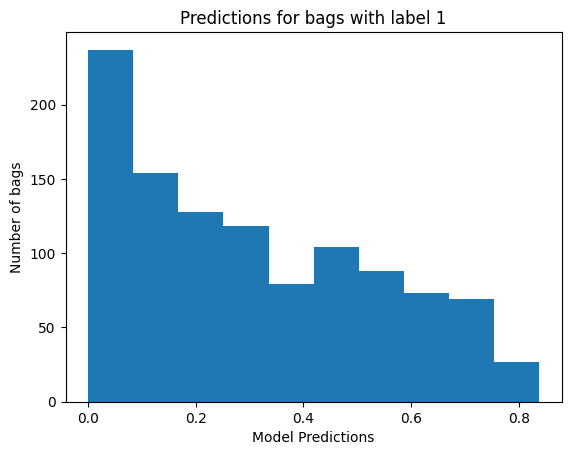

In [9]:
plt.hist(test_set.loc[test_set.label == 1, "predictions"])
plt.xlabel("Model Predictions")
plt.ylabel("Number of bags")
plt.title("Predictions for bags with label 1")
plt.show()

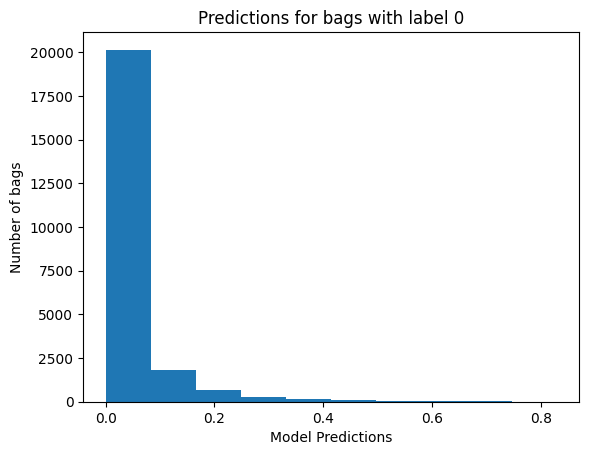

In [10]:
plt.hist(test_set.loc[test_set.label == 0, "predictions"])
plt.xlabel("Model Predictions")
plt.ylabel("Number of bags")
plt.title("Predictions for bags with label 0")
plt.show()

In [11]:
thresholds = np.arange(0,1.01,0.01)

def calculate_tpr_fpr(predictions, observations):
    TP = sum((p == 1 and o == 1) for p, o in zip(predictions, observations))
    FN = sum((p == 0 and o == 1) for p, o in zip(predictions, observations))
    FP = sum((p == 1 and o == 0) for p, o in zip(predictions, observations))
    TN = sum((p == 0 and o == 0) for p, o in zip(predictions, observations))

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    return TPR, FPR

In [24]:
feature_names = ['left_dwell 0.0', 'left_dwell 0.05',
       'left_dwell 0.25', 'left_dwell 0.5', 'left_dwell 0.75',
       'left_dwell 0.95', 'left_dwell 1.0', 'left_std 0.0', 'left_std 0.05',
       'left_std 0.25', 'left_std 0.5', 'left_std 0.75', 'left_std 0.95',
       'left_std 1.0', 'left_mean 0.0', 'left_mean 0.05', 'left_mean 0.25',
       'left_mean 0.5', 'left_mean 0.75', 'left_mean 0.95', 'left_mean 1.0',
       'mid_dwell 0.0', 'mid_dwell 0.05', 'mid_dwell 0.25', 'mid_dwell 0.5',
       'mid_dwell 0.75', 'mid_dwell 0.95', 'mid_dwell 1.0', 'mid_std 0.0',
       'mid_std 0.05', 'mid_std 0.25', 'mid_std 0.5', 'mid_std 0.75',
       'mid_std 0.95', 'mid_std 1.0', 'mid_mean 0.0', 'mid_mean 0.05',
       'mid_mean 0.25', 'mid_mean 0.5', 'mid_mean 0.75', 'mid_mean 0.95',
       'mid_mean 1.0', 'right_dwell 0.0', 'right_dwell 0.05',
       'right_dwell 0.25', 'right_dwell 0.5', 'right_dwell 0.75',
       'right_dwell 0.95', 'right_dwell 1.0', 'right_std 0.0',
       'right_std 0.05', 'right_std 0.25', 'right_std 0.5', 'right_std 0.75',
       'right_std 0.95', 'right_std 1.0', 'right_mean 0.0', 'right_mean 0.05',
       'right_mean 0.25', 'right_mean 0.5', 'right_mean 0.75',
       'right_mean 0.95', 'right_mean 1.0']
def generate_roc_curve(model):
    predictions = model.predict(test_set.loc[:,feature_names])
    
    tpr = []
    fpr = []
    for threshold in thresholds:
        classifications = (predictions >= threshold).astype(int)
        observations = test_set.label
        statistics = calculate_tpr_fpr(classifications, observations)
        tpr.append(statistics[0])
        fpr.append(statistics[1])
    
    plt.plot(fpr, tpr)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.show()
    
    auroc = auc(fpr, tpr)
    
    return tpr, fpr, auroc

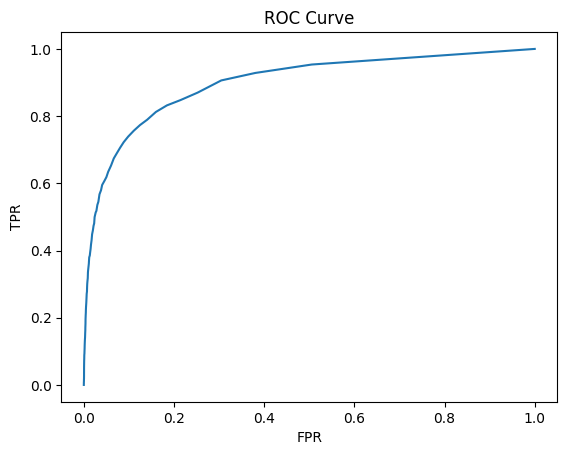

In [16]:
tpr, fpr, auroc = generate_roc_curve(rf)

In [27]:
importances = {}
for feature_importance, feature_name in zip(rf.feature_importances_ * 100, feature_names):
    importances[feature_name] = feature_importance

In [28]:
importances

{'left_dwell 0.0': 0.6199662662644,
 'left_dwell 0.05': 1.0692609317664108,
 'left_dwell 0.25': 1.1869045014163844,
 'left_dwell 0.5': 1.0567746582055357,
 'left_dwell 0.75': 1.2643925247136958,
 'left_dwell 0.95': 1.2941163907020563,
 'left_dwell 1.0': 1.5176677343261156,
 'left_std 0.0': 1.8162521561709826,
 'left_std 0.05': 4.121406275163698,
 'left_std 0.25': 1.588881073294309,
 'left_std 0.5': 1.1873019934972715,
 'left_std 0.75': 1.1517290880251643,
 'left_std 0.95': 1.2616519371357517,
 'left_std 1.0': 1.3914946582427157,
 'left_mean 0.0': 0.982458633580583,
 'left_mean 0.05': 1.44923106519069,
 'left_mean 0.25': 1.0693158693123677,
 'left_mean 0.5': 1.0452018866911439,
 'left_mean 0.75': 2.5659255834321217,
 'left_mean 0.95': 1.2318158433266209,
 'left_mean 1.0': 0.8542967921769108,
 'mid_dwell 0.0': 0.5998716213797336,
 'mid_dwell 0.05': 1.1631838639099132,
 'mid_dwell 0.25': 1.2900533913806065,
 'mid_dwell 0.5': 1.3105383901287986,
 'mid_dwell 0.75': 1.3174535934345315,
 'mid